# 操作データの解析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# def interpolate_timeseries_irregular_to_regular(df: pd.DataFrame, interval):
#     """
#     不規則なサンプリングの時系列データから等間隔のデータを生成する。
    
#     Parameters:
#         df (DataFrame): 不規則なサンプリングの時系列データが格納されたPandas DataFrame。
#         interval (float): 等間隔データの間隔（秒）。
    
#     Returns:
#         DataFrame: 等間隔のデータが格納されたPandas DataFrame。
#     """
#     # 時刻列をインデックスに設定する
#     df.set_index('timestamp', inplace=True)
    
#     # 等間隔の時刻インデックスを生成する
#     start_time = df.index.min()
#     end_time = df.index.max()
#     regular_index = pd.date_range(start=start_time, end=end_time, freq=f'{interval}S')
    
#     # 不規則なデータを等間隔のデータに補間する
#     interpolated_df = df.reindex(regular_index)
#     interpolated_df.interpolate(method='time', inplace=True)
    
#     return interpolated_df

df = pd.read_csv("/home/ryutaro/workspace/remote_robot/remote_robot/masterslave2/output/br2.csv")
# df = pd.read_csv("br2.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['x'] -= df['x'][0]
df['y'] -= df['y'][0]
df['z'] -= df['z'][0]
df['r'] -= df['r'][0]
df.head()

/home/ryutaro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,timestamp,x,y,z,r
0,2024-06-05 18:53:15.056767,0.0,0.0,0.0,0.0
1,2024-06-05 18:53:15.142992,0.0,0.0,0.0,0.0
2,2024-06-05 18:53:15.220987,0.0,0.0,0.0,0.0
3,2024-06-05 18:53:15.296410,0.0,0.0,0.0,0.0
4,2024-06-05 18:53:15.411189,0.0,0.0,0.0,0.0


In [2]:
# 移動平均を計算するためのウィンドウサイズを指定する
window_size = 10

# x座標とy座標それぞれに対して移動平均を計算する
df['x_movave'] = df['x'].rolling(window=window_size, min_periods=1).mean()
df['y_movave'] = df['y'].rolling(window=window_size, min_periods=1).mean()
df['z_movave'] = df['z'].rolling(window=window_size, min_periods=1).mean()

# 移動平均が計算された後、速度を計算する
df['x_vel'] = df['x_movave'].diff()
df['y_vel'] = df['y_movave'].diff()
df['z_vel'] = df['z_movave'].diff()

df['xy_vel'] = (df['x_vel'] ** 2 + df['y_vel'] ** 2) ** 0.5

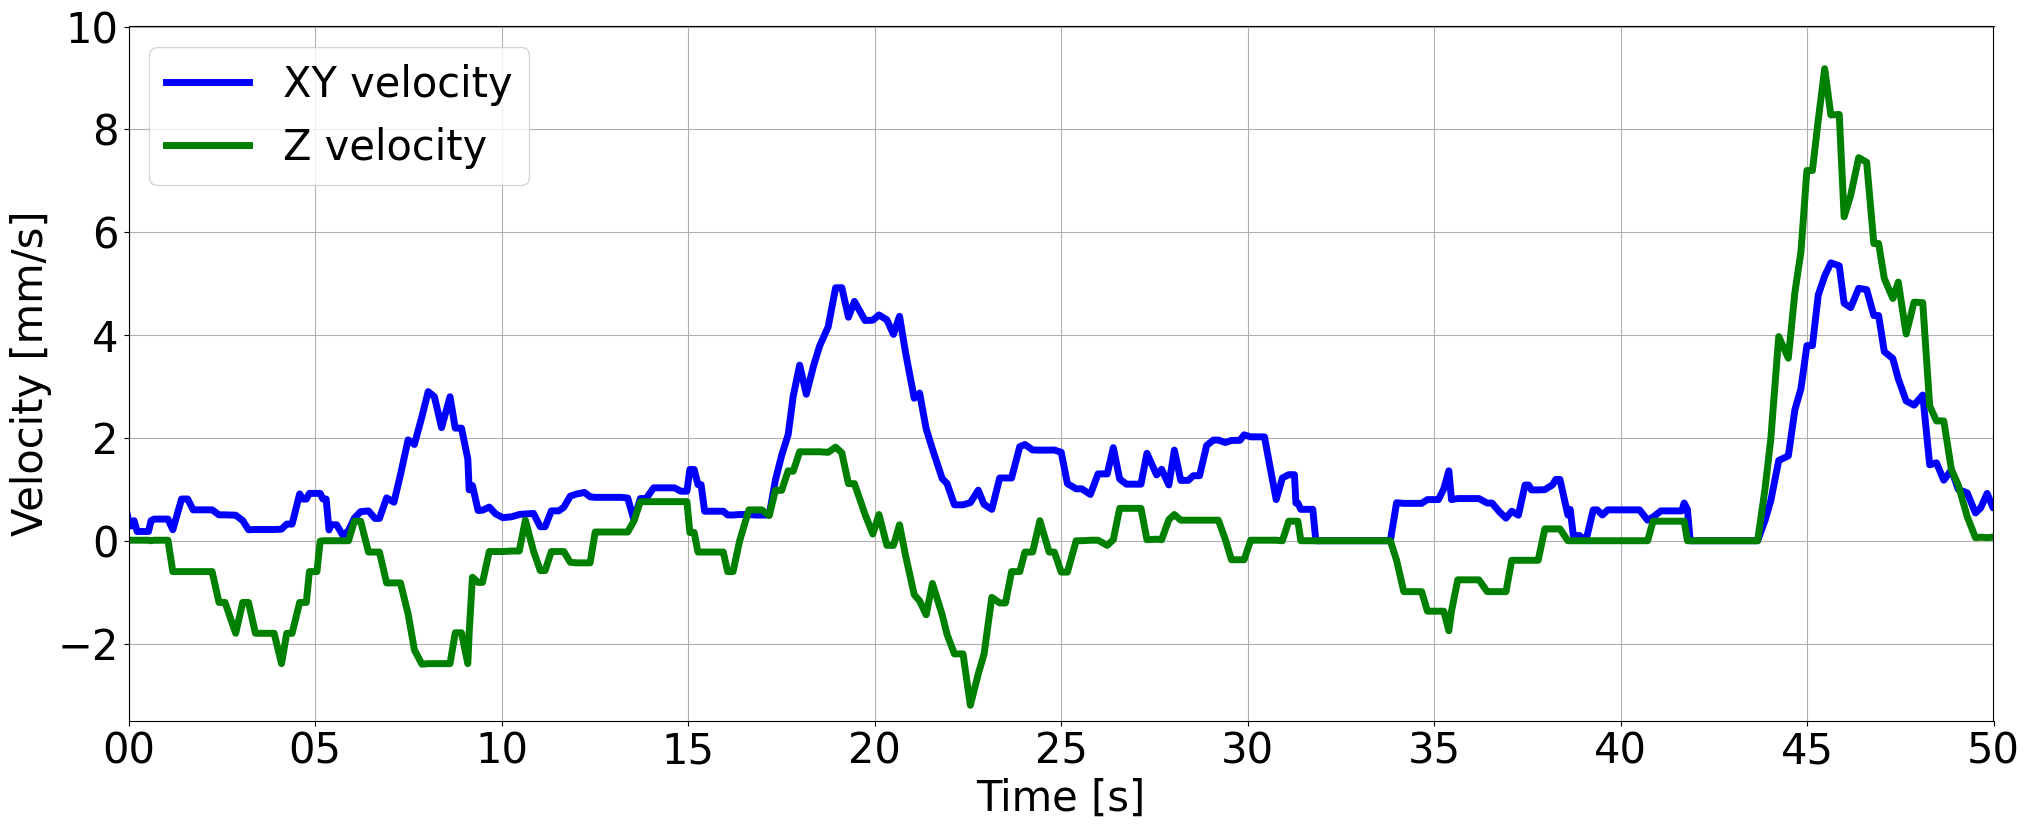

In [19]:
import matplotlib.dates as mdates
plt.rcParams["font.size"] = 30

fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.plot(df['timestamp'].to_numpy(), df['xy_vel'].to_numpy() * 10, linewidth = 5, color='blue')
ax.plot(df['timestamp'].to_numpy(), df['z_vel'].to_numpy() * 10, linewidth = 5, color='green')
ax.set_xlim([pd.Timestamp("2024/06/05-18:55:00"), pd.Timestamp("2024/06/05-18:55:50")])
ax.set_ylim([-3.5, 10])
# ax.set_ylim([-0.35, 1.0])
# 横軸のフォーマットを設定
ax.xaxis.set_major_formatter(mdates.DateFormatter('%S'))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [mm/s]')
plt.legend(['XY velocity', 'Z velocity'])

plt.tight_layout()
# plt.xlim([pd.Timestamp("2024/06/05-18:54:05"), pd.Timestamp("2024/06/05-18:56:00")])
plt.grid()
plt.show()

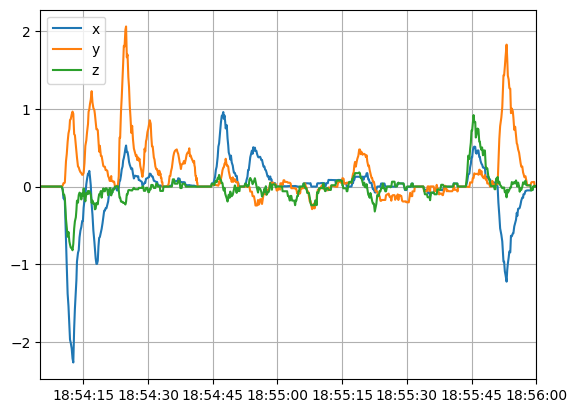

In [102]:
# plt.plot(df['timestamp'].to_numpy(), df['x'].to_numpy(), label='x')
# plt.plot(df['timestamp'].to_numpy(), df['y'].to_numpy(), label='y')
plt.plot(df['timestamp'].to_numpy(), df['x_movave'].diff().to_numpy(), label='x')
plt.plot(df['timestamp'].to_numpy(), df['y_movave'].diff().to_numpy(), label='y')
plt.plot(df['timestamp'].to_numpy(), df['z_movave'].diff().to_numpy(), label='z')
plt.xlim([pd.Timestamp("2024/06/05-18:54:05"), pd.Timestamp("2024/06/05-18:56:00")])
plt.legend()
plt.grid()
plt.show()

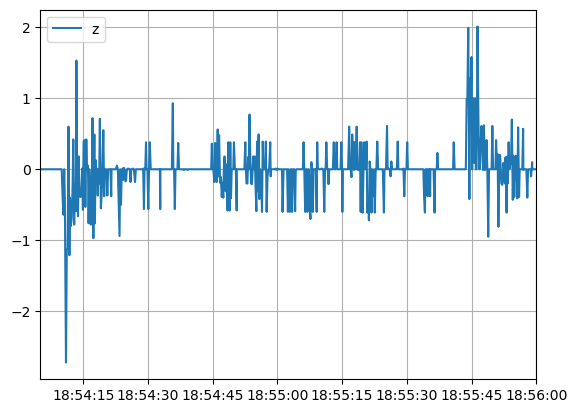

In [ ]:
# plt.plot(df['timestamp'].to_numpy(), df['x'].to_numpy(), label='x')
# plt.plot(df['timestamp'].to_numpy(), df['y'].to_numpy(), label='y')
plt.plot(df['timestamp'].to_numpy(), df['z'].diff().to_numpy(), label='z')
plt.xlim([pd.Timestamp("2024/06/05-18:54:05"), pd.Timestamp("2024/06/05-18:56:00")])
plt.legend()
plt.grid()
plt.show()

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

# 雑多

## draw_line_through_pointテスト

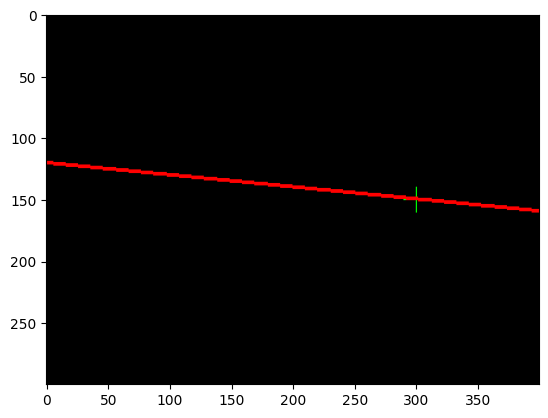

In [26]:
import numpy as np
import cv2

def draw_line_through_point(img: np.ndarray, x: int, y: int, a: int|float) -> np.ndarray:
    """
    (x, y)を通り傾きがaの直線をOpenCVの画像imgに描画する関数

    Args:
        img (np.ndarray): 描画対象の画像
        x (int): 直線が通るx座標
        y (int): 直線が通るy座標
        a (int|float): 直線の傾き

    Returns:
        np.ndarray: 直線が描画された画像
    """
    # 画像サイズを取得
    height, width = img.shape[:2]

    # 直線の方程式 y = ax + b を解いてbを求める
    b = y - a * x

    # 画像の四隅を通る直線の始点と終点を計算
    # 画像の左端でのy座標
    y_at_x0 = a * 0 + b
    # 画像の右端でのy座標
    y_at_xmax = a * (width - 1) + b

    # 画像の上端でのx座標
    x_at_y0 = (0 - b) / a if a != 0 else -np.inf
    # 画像の下端でのx座標
    x_at_ymax = ((height - 1) - b) / a if a != 0 else -np.inf

    # 画像の範囲内に収まるように始点と終点を調整
    points = []
    if 0 <= y_at_x0 <= height - 1:
        points.append((0, int(y_at_x0)))
    if 0 <= y_at_xmax <= height - 1:
        points.append((width - 1, int(y_at_xmax)))
    if 0 <= x_at_y0 <= width - 1:
        points.append((int(x_at_y0), 0))
    if 0 <= x_at_ymax <= width - 1:
        points.append((int(x_at_ymax), height - 1))

    # 始点と終点が2点以上ある場合、最も離れた2点を選択
    if len(points) > 1:
        points.sort()  # x座標によってソート
        cv2.line(img, points[0], points[-1], (255, 0, 0), 2)

    return img

# 使用例
x, y = 300, 150
image = np.zeros((300, 400, 3), dtype=np.uint8)  # 300x400の黒い画像を作成
image = cv2.drawMarker(image, (x, y), (0,255,0))  # 300x400の黒い画像を作成

result_image = draw_line_through_point(image, x=x, y=y, a=.1)  # (200, 150)を通り傾き1.5の直線を描画
plt.imshow(result_image)
